<a href="https://colab.research.google.com/github/aashita-ag/nlp_project-2021/blob/main/nlp_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
file = open(r"/content/drive/MyDrive/jungle.txt",encoding='utf-8')

In [ ]:
#Remove \n occurence
wordslist = file.read().splitlines() 
T2 = ""
T2 = T2.join(wordslist)
T2[:2000]

'\ufeffThe Project Gutenberg EBook of The Jungle Book, by Rudyard KiplingThis eBook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever.  You may copy it, give it away orre-use it under the terms of the Project Gutenberg License includedwith this eBook or online at www.gutenberg.orgTitle: The Jungle BookAuthor: Rudyard KiplingRelease Date: January 16, 2006 [EBook #236]Last Updated: October 6, 2016Language: EnglishCharacter set encoding: UTF-8*** START OF THIS PROJECT GUTENBERG EBOOK THE JUNGLE BOOK ***Produced by An Anonymous Volunteer and David WidgerTHE JUNGLE BOOKBy Rudyard KiplingContents     Mowgli’s Brothers     Hunting-Song of the Seeonee Pack     Kaa’s Hunting     Road-Song of the Bandar-Log     “Tiger! Tiger!”      Mowgli’s Song     The White Seal     Lukannon     “Rikki-Tikki-Tavi”      Darzee’s Chant     Toomai of the Elephants     Shiv and the Grasshopper     Her Majesty’s Servants     Parade Song of the Camp AnimalsMowgli’s Brothers     N

In [ ]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
text = ""
for char in T2:
    if char not in punctuations:
        text += char
T2=text
T2[:2000]

'\ufeffThe Project Gutenberg EBook of The Jungle Book by Rudyard KiplingThis eBook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  You may copy it give it away orreuse it under the terms of the Project Gutenberg License includedwith this eBook or online at wwwgutenbergorgTitle The Jungle BookAuthor Rudyard KiplingRelease Date January 16 2006 EBook 236Last Updated October 6 2016Language EnglishCharacter set encoding UTF8 START OF THIS PROJECT GUTENBERG EBOOK THE JUNGLE BOOK Produced by An Anonymous Volunteer and David WidgerTHE JUNGLE BOOKBy Rudyard KiplingContents     Mowglis Brothers     HuntingSong of the Seeonee Pack     Kaas Hunting     RoadSong of the BandarLog     Tiger Tiger      Mowglis Song     The White Seal     Lukannon     RikkiTikkiTavi      Darzees Chant     Toomai of the Elephants     Shiv and the Grasshopper     Her Majestys Servants     Parade Song of the Camp AnimalsMowglis Brothers     Now Rann the Kite brings home the night   

In [ ]:
#Converting the text into lower case       
T2 = T2.lower()
T2[:2000]

'\ufeffthe project gutenberg ebook of the jungle book by rudyard kiplingthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle the jungle bookauthor rudyard kiplingrelease date january 16 2006 ebook 236last updated october 6 2016language englishcharacter set encoding utf8 start of this project gutenberg ebook the jungle book produced by an anonymous volunteer and david widgerthe jungle bookby rudyard kiplingcontents     mowglis brothers     huntingsong of the seeonee pack     kaas hunting     roadsong of the bandarlog     tiger tiger      mowglis song     the white seal     lukannon     rikkitikkitavi      darzees chant     toomai of the elephants     shiv and the grasshopper     her majestys servants     parade song of the camp animalsmowglis brothers     now rann the kite brings home the night   

In [ ]:
#Remove numbers
T2 = re.sub(r'\d+','',T2)
T2[:2000]

'\ufeffthe project gutenberg ebook of the jungle book by rudyard kiplingthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle the jungle bookauthor rudyard kiplingrelease date january   ebook last updated october  language englishcharacter set encoding utf start of this project gutenberg ebook the jungle book produced by an anonymous volunteer and david widgerthe jungle bookby rudyard kiplingcontents     mowglis brothers     huntingsong of the seeonee pack     kaas hunting     roadsong of the bandarlog     tiger tiger      mowglis song     the white seal     lukannon     rikkitikkitavi      darzees chant     toomai of the elephants     shiv and the grasshopper     her majestys servants     parade song of the camp animalsmowglis brothers     now rann the kite brings home the night        that mang 

In [ ]:
#Remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())
remove_whitespace(T2)

'\ufeffthe project gutenberg ebook of the jungle book by rudyard kiplingthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle the jungle bookauthor rudyard kiplingrelease date january ebook last updated october language englishcharacter set encoding utf start of this project gutenberg ebook the jungle book produced by an anonymous volunteer and david widgerthe jungle bookby rudyard kiplingcontents mowglis brothers huntingsong of the seeonee pack kaas hunting roadsong of the bandarlog tiger tiger mowglis song the white seal lukannon rikkitikkitavi darzees chant toomai of the elephants shiv and the grasshopper her majestys servants parade song of the camp animalsmowglis brothers now rann the kite brings home the night that mang the bat sets free the herds are shut in byre and hut for loosed till dawn

In [ ]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

lemmatize_word(T2)

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'jungle',
 'book',
 'by',
 'rudyard',
 'kiplingthis',
 'ebook',
 'be',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'withalmost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'orreuse',
 'it',
 'under',
 'the',
 'term',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'includedwith',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'wwwgutenbergorgtitle',
 'the',
 'jungle',
 'bookauthor',
 'rudyard',
 'kiplingrelease',
 'date',
 'january',
 'ebook',
 'last',
 'update',
 'october',
 'language',
 'englishcharacter',
 'set',
 'encode',
 'utf',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'jungle',
 'book',
 'produce',
 'by',
 'an',
 'anonymous',
 'volunteer',
 'and',
 'david',
 'widgerthe',
 'jungle',
 'bookby',
 'rudyard',
 'kiplingcontents',
 'mowglis',
 'brothers',
 'huntingsong',
 'of',
 'the',
 'seeo

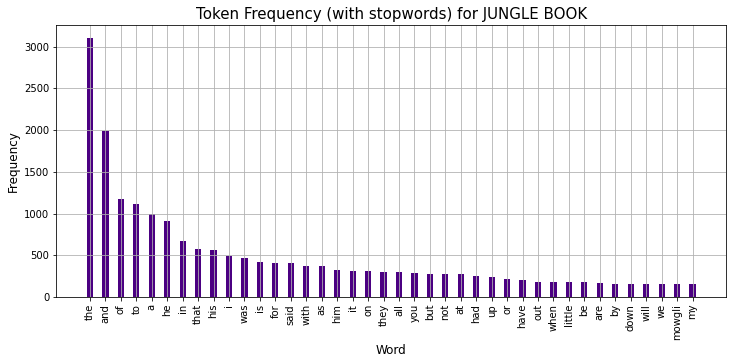

In [ ]:
#Frequency distribution of tokens(with stopwords)
tokens = word_tokenize(T2)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords) for JUNGLE BOOK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

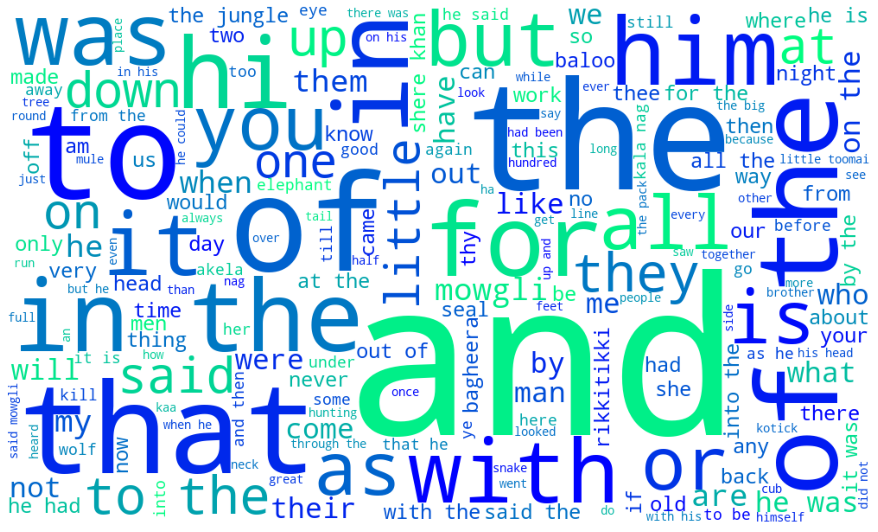

In [ ]:
#Wordcloud (with stopwords)
wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 5,stopwords = {},colormap='winter').generate(T2) 
plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(T2)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
text = " "
text = text.join(tokens_final)
T2=text
T2[:2000]

'\ufeffthe project gutenberg ebook jungle book rudyard kiplingthis ebook use anyone anywhere cost withalmost restrictions whatsoever may copy give away orreuse terms project gutenberg license includedwith ebook online wwwgutenbergorgtitle jungle bookauthor rudyard kiplingrelease date january ebook last updated october language englishcharacter set encoding utf start project gutenberg ebook jungle book produced anonymous volunteer david widgerthe jungle bookby rudyard kiplingcontents mowglis brothers huntingsong seeonee pack kaas hunting roadsong bandarlog tiger tiger mowglis song white seal lukannon rikkitikkitavi darzees chant toomai elephants shiv grasshopper majestys servants parade song camp animalsmowglis brothers rann kite brings home night mang bat sets free herds shut byre hut loosed till dawn hour pride power talon tush claw oh hear callgood hunting keep jungle law nightsong jungleit seven oclock warm evening seeonee hills whenfather wolf woke days rest scratched yawned andspr

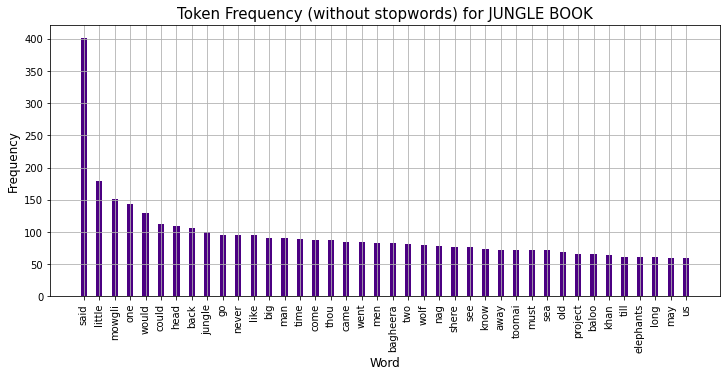

In [ ]:
#Frequency distribution of tokens(without stopwords)
tokens = word_tokenize(T2)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords) for JUNGLE BOOK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

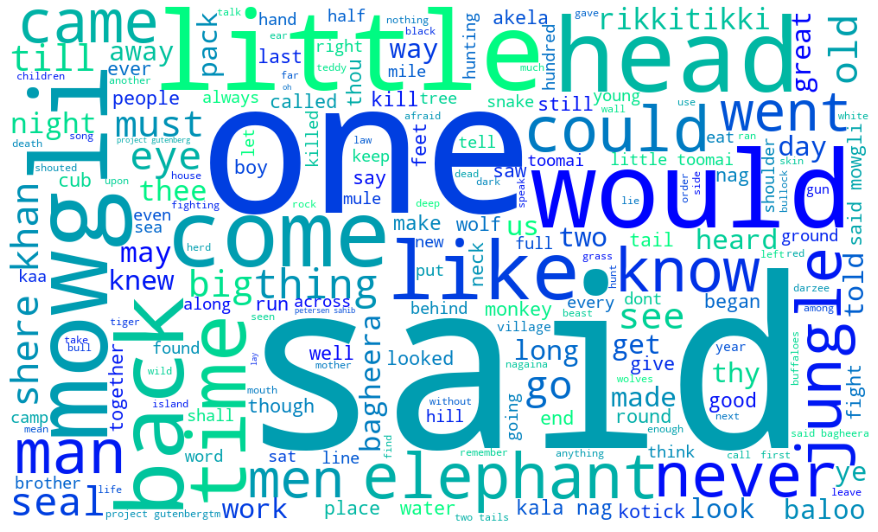

In [ ]:
#Word cloud after removing stopwords
wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white', 
                min_font_size = 5,stopwords = {},colormap='winter').generate(T2) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

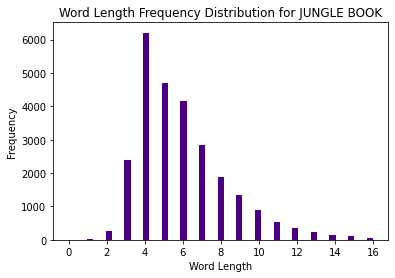

In [ ]:
bin_size=np.linspace(0,16)
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size,color='indigo')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Frequency Distribution for JUNGLE BOOK')
plt.show()

In [ ]:
#POS tags
tagged = nltk.pos_tag(tokens) 
tagged[:20] 

[('\ufeffthe', 'NN'),
 ('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'VB'),
 ('jungle', 'NN'),
 ('book', 'NN'),
 ('rudyard', 'NN'),
 ('kiplingthis', 'NN'),
 ('ebook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('cost', 'VBZ'),
 ('withalmost', 'NN'),
 ('restrictions', 'NNS'),
 ('whatsoever', 'WDT'),
 ('may', 'MD'),
 ('copy', 'VB'),
 ('give', 'VB'),
 ('away', 'RP')]

In [ ]:
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 8528, 'JJ': 4733, 'NNS': 2729, 'VBD': 2305, 'RB': 1819, 'VBP': 1324, 'VBG': 985, 'VB': 921, 'VBN': 785, 'IN': 578, 'MD': 437, 'VBZ': 339, 'CD': 326, 'JJS': 97, 'PRP': 74, 'JJR': 71, 'DT': 66, 'RP': 49, 'WP': 46, 'RBR': 32, 'FW': 24, 'NNP': 20, 'CC': 12, 'WRB': 7, 'WDT': 5, 'WP$': 5, 'PRP$': 4, 'EX': 4, 'RBS': 3, 'PDT': 1, 'UH': 1})


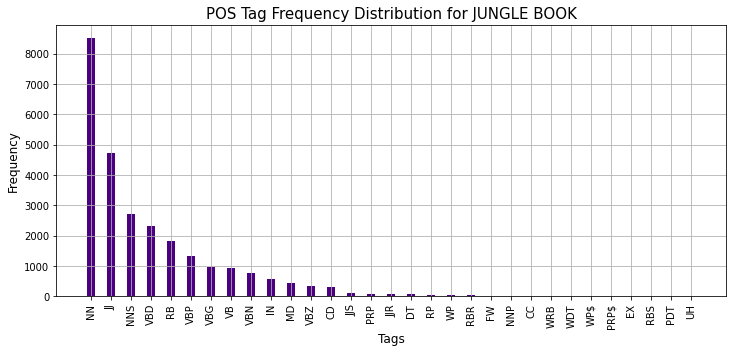

In [ ]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('POS Tag Frequency Distribution for JUNGLE BOOK',size=15)
plt.xlabel('Tags',size=12)
plt.ylabel('Frequency',size=12)
plt.show()